I'll try to compute 

$$ \int_{[0,1]}x^2\,dx$$

using the BQ estimator. Note that I use the Lorentz kernel 

$$ k(x,y) = \frac{1}{1+|x-y|^2}$$

The estimator is 

$$ I = u(\textbf{D})^{\top}K(\textbf{D},\textbf{D})^{-1}f(\textbf{D})$$

In [1]:
using Pkg
Pkg.add("Distributions")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %.5 %           ]  71.3 % Resolving package versions...
 Installed PDMats ──────── v0.9.10
 Installed StatsFuns ───── v0.9.0
 Installed Rmath ───────── v0.5.1
 Installed QuadGK ──────── v2.1.1
 Installed Arpack ──────── v0.3.1
 Installed Distributions ─ v0.21.8
  Updating `~/.julia/environments/v1.2/Project.toml`
  [31c24e10] + Distributions v0.21.8
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [7d9fca2a] + Arpack v0.3.1
  [9e28174c] + BinDeps v0.8.10
  [9a962f9c] + DataAPI v1.1.0
  [31c24e10] + Distributions v0.21.8
  [e1d29d7a] + Missings v0.4.3
  [90014a1f] + PDMats v0.9.10
  [1fd47b50] + QuadGK v2.1.1
  [79098fc4] + Rmath v0.5.1
  [a2af1166] + SortingAlgorithms v0.3.1
  [276daf66] + SpecialFunctions v0.8.0
  [2913bbd2] + StatsBase v0.32.0
  [4c63d2b9] + StatsFuns v0.9.0
  [30578b45] + URI

In [1]:
using LinearAlgebra
using PyPlot
using Statistics
using FFTW

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/shashanksule/.julia/packages/PyPlot/4wzW1/src/init.jl:192


In [7]:
function LorentzCoKer(D)
    N = length(D)
    K = zeros(N,N)
    for i in 1:N
        for j in 1:N
            K[i,j] = 1/(1+(norm(D[i] - D[j]))^2);
        end
    end
    return K
end

LorentzCoKer (generic function with 1 method)

In [8]:
using LinearAlgebra

function BQ(N,f)
    
    N = 10
    D = [rand() for i in 1:N];
    K = LorentzCoKer(D);
    K_inv = K \ I
    u_D = atan.(1 .- D) - atan.(.- D);
    transpose(u_D)*(K_inv)*(f.(D))
end

BQ (generic function with 1 method)

In [9]:
f(x) = x^2
vals = [BQ(10,f) for i in 1:100];

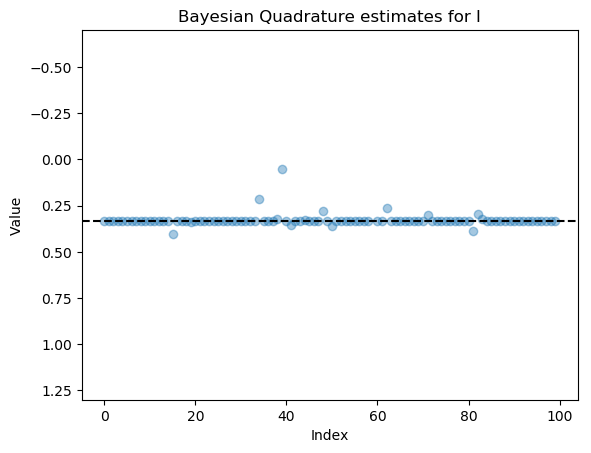

In [10]:
plot(vals, "o", alpha=0.4);
ylim([1.3, -0.7]);
axhline(1/3, color="k", ls="--");
title("Bayesian Quadrature estimates for I");
xlabel("Index");
ylabel("Value");

Scary! It is accurate within 4 decimal points while Simple Monte Carlo seems to take forever on a uniform distribution!

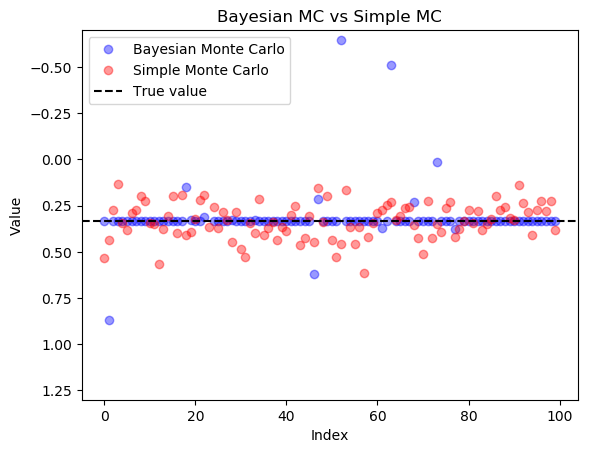

In [7]:
function integrate_mc_nonuniform(f, a, b, N, sample)
    """ Integrate f over [a, b]
    with N samples using Monte Carlo integration
    by sampling from the nonuniform distribution using sample,
    which must provide points from [a, b]
    """    
    S = 0.0
    V = b - a
    for i=1:N
        # sample a point from dist
        x = sample()
        
        S += f(x)
    end
    
    return S*(V/N)
end
N = 10
f(x) = x^2
# uniform
integrate_mc_nonuniform(f, 0.0, 1.0, N, rand)

vals2 = [integrate_mc_nonuniform(f, 0.0, 1.0, N, rand) for i in 1:100];

plot(vals, "bo", label="Bayesian Monte Carlo", alpha=0.4);
plot(vals2, "ro", label="Simple Monte Carlo", alpha=0.4);
ylim([1.3, -0.7]);
axhline(1/3, color="k", ls="--", label="True value");
title("Bayesian MC vs Simple MC");
xlabel("Index");
ylabel("Value");
legend();

The only issue with Bayesian MC is that it depends on the invertibility of the covariance kernel matrix $K$. Most authors actually implement this method differently from the above proof-of-concept implementation perhaps because of the conditioning issue in computing the inverse of $K$. But anyway, it demonstrates the value of thinking about $I$ as a statistical problem! 